# Quantum State Preparation with Limited Connectivity and Basis Gates

In this notebook, we will explore how to prepare a specific quantum state using a quantum circuit that is constrained by a particular hardware architecture and a limited set of basis gates. We will explain how this approach differs from previous solutions and provide detailed explanations alongside the code.

## Introduction

Quantum state preparation is a fundamental task in quantum computing. Preparing arbitrary quantum states efficiently is crucial for quantum algorithms. However, hardware limitations such as qubit connectivity and available gate sets can make this task challenging.

In this example, we aim to prepare the given quantum state on a 5-qubit system as in the task

The computational basis states correspond to the following binary representations (from least significant bit to most significant bit):

|12⟩: 01100
|17⟩: 10001
|22⟩: 10110
|27⟩: 11011
Our goal is to construct a quantum circuit that prepares this state, using only the basis gates ['x', 'h', 'rz', 'cx'], and with the following qubit connectivity (architecture):

Qubit 4 is connected to all other qubits (qubits 0, 1, 2, 3).
Qubit 0 is connected to qubit 1.
Qubit 2 is connected to qubit 3.
Additionally, we aim to keep the circuit depth less than 50.

## Implementation

Let's proceed step by step to construct the quantum circuit.

Imports
First, we import the necessary modules from Qiskit and other libraries.

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import XGate, HGate, RZGate
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np


## Defining the Target State
We define the size of the quantum system and specify the computational basis states that will have non-zero amplitudes in our target state.

In [6]:
# Define size and state values
size = 5
state_values = [22, 17, 27, 12]

# Initialize state vector
state_vector = [0] * 2**size
print("Target computational basis states:")
for s in state_values:
    print(f"|{np.binary_repr(s, size)}⟩")
    state_vector[s] = 0.5  # Assign amplitude 0.5 to each target state
state_vector = np.asarray(state_vector)

Target computational basis states:
|10110⟩
|10001⟩
|11011⟩
|01100⟩


## Initializing the Quantum Circuit
We create a quantum circuit with 5 qubits.

In [7]:
# Initialize Quantum Circuit
qc = QuantumCircuit(size)


## Applying Gates Based on the Architecture
Applying Hadamard Gates

We apply Hadamard gates to specific qubits to create superposition states. According to our architecture, we can apply gates to qubits 0 and 4.

In [9]:
# Apply Hadamard gates to specific qubits based on architecture
qc.h(4)  # Apply H to qubit 4 as the central qubit
qc.h(0)  # Apply H to qubit 0 for superposition


## Applying Controlled-NOT Gates

We use CNOT gates to entangle qubits according to the desired state configurations and respecting the connectivity constraints.

In [10]:
# Apply controlled gates based on the given architecture
# Using qubit 4 as a hub for connectivity
qc.cx(4, 1)  # Control on qubit 4 to target qubit 1
qc.cx(4, 3)  # Control on qubit 4 to target qubit 3
qc.cx(4, 2)  # Control on qubit 4 to target qubit 2


## Applying Phase Adjustments with RZ Gates

To adjust the amplitudes and phases of the superposition, we apply RZ rotations to certain qubits. These rotations help us achieve the correct interference patterns needed for the target state.

In [11]:
# Apply phase adjustments to achieve the required amplitudes
qc.rz(np.pi / 4, 2)  # RZ gate for phase rotation on qubit 2
qc.rz(np.pi / 8, 1)  # RZ gate for phase rotation on qubit 1


## Additional Entanglement

We add an additional CNOT gate between qubit 1 and qubit 0, utilizing the connectivity between these qubits. This step helps in creating the necessary entanglement to reach the target state.

In [12]:
# Adding custom gate combinations to achieve required amplitudes
qc.cx(1, 0)  # Apply CX between qubit 1 and qubit 0


## Transpiling the Circuit
We transpile the circuit to limit it to the specified basis gates and optimize it while respecting the coupling map (connectivity constraints).

In [13]:
# Transpile circuit to limit to specified basis gates and optimize
basis_gates = ['x', 'h', 'rz', 'cx']
coupling_map = [[4, 0], [4, 1], [4, 2], [4, 3], [0, 1], [2, 3]]  # Include connections according to architecture
qc = transpile(qc, basis_gates=basis_gates, optimization_level=3, coupling_map=coupling_map)


## Visualizing the Quantum Circuit
We can now visualize the quantum circuit to understand the sequence of gates applied.

                        ┌───┐                               ┌───┐┌─────────┐
q_2 -> 0 ───────────────┤ X ├───────────────────────────────┤ X ├┤ Rz(π/4) ├
                   ┌───┐└─┬─┘                     ┌───┐     └─┬─┘└─────────┘
q_3 -> 1 ──────────┤ X ├──┼───────────────────────┤ X ├───────┼─────────────
              ┌───┐└─┬─┘  │       ┌───┐┌─────────┐└─┬─┘       │             
q_1 -> 2 ─────┤ X ├──┼────┼───────┤ X ├┤ Rz(π/8) ├──┼────■────┼─────────────
         ┌───┐└─┬─┘  │    │       └─┬─┘└─────────┘  │  ┌─┴─┐  │             
q_0 -> 3 ┤ H ├──┼────┼────┼─────────┼───────────────┼──┤ X ├──┼─────────────
         └───┘  │    │    │  ┌───┐  │               │  └───┘  │             
q_4 -> 4 ───────■────■────■──┤ H ├──■───────────────■─────────■─────────────
                             └───┘                                          


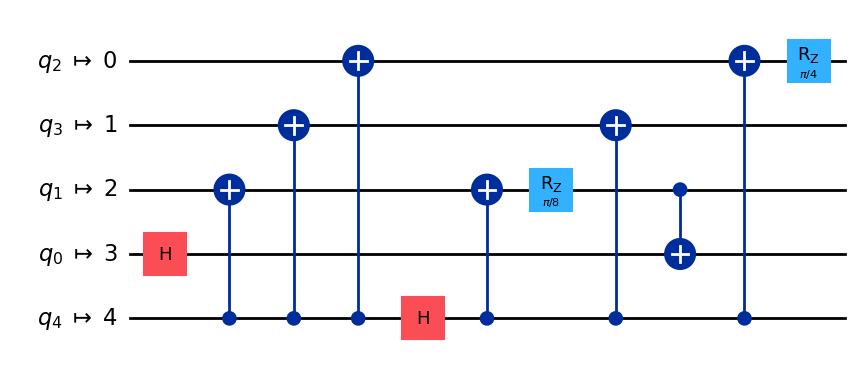

In [16]:
# Print the resulting quantum circuit
print(qc)
qc.draw(output='mpl')


## Analyzing the Circuit Depth
We check the depth of the circuit to ensure it meets the depth constraint.

In [19]:
# Print the circuit depth
depth = qc.depth()
print("Circuit Depth:", depth)


Circuit Depth: 8


## Validating the Prepared State
We compute the state vector resulting from the circuit and compare it to the target state.

In [20]:
# Validate statevector (approximation)
state = Statevector.from_instruction(qc)
print("Resulting Statevector:")
print(state.data)  # Check resulting state vector (should approximate desired state)


Resulting Statevector:
[0.41573481-0.27778512j 0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.41573481-0.27778512j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.41573481+0.27778512j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.41573481+0.27778512j]


Visualizing the State
Plotting the State on the Bloch Sphere

We plot the state vector on the Bloch sphere to visualize the quantum state.

Plotting the Probability Histogram

We plot the histogram of probabilities for each computational basis state.

In [ ]:
# Plot the state vector on the Bloch sphere
plot_bloch_multivector(state)
plt.show()
# Plot histogram of probabilities
counts = state.probabilities_dict()
plot_histogram(counts)
plt.show()
